<a href="https://colab.research.google.com/github/cutemfc/Time_series_project/blob/main/Kaggle_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#This will prompt you to upload the kaggle .json file
files.upload()




{}

In [ ]:
# Create the kaggle directory and
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set the correct permissions
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#List the available datasets
!kaggle competitions files -c favorita-grocery-sales-forecasting

name                            size  creationDate                
------------------------  ----------  --------------------------  
holidays_events.csv.7z          1898  2018-06-20 06:10:54.148000  
items.csv.7z                   14315  2018-06-20 06:10:54.148000  
oil.csv.7z                      3762  2018-06-20 06:10:54.148000  
sample_submission.csv.7z      666528  2018-06-20 06:10:54.148000  
stores.csv.7z                    648  2018-06-20 06:10:54.148000  
test.csv.7z                  4885065  2018-06-20 06:10:54.148000  
train.csv.7z               474092593  2018-06-20 06:10:54.148000  
transactions.csv.7z           219499  2018-06-20 06:10:54.148000  


In [ ]:
# Download the datasets
!kaggle competitions download -c favorita-grocery-sales-forecasting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p /content/drive/MyDrive/retail_kaggle_data
!cp favorita-grocery-sales-forecasting.zip /content/drive/MyDrive/retail_kaggle_data/.


In [ ]:
# Unzip the downloaded dataset
!unzip /content/drive/MyDrive/retail_kaggle_data/favorita-grocery-sales-forecasting.zip

Archive:  /content/drive/MyDrive/retail_kaggle_data/favorita-grocery-sales-forecasting.zip
  inflating: holidays_events.csv.7z  
  inflating: items.csv.7z            
  inflating: oil.csv.7z              
  inflating: sample_submission.csv.7z  
  inflating: stores.csv.7z           
  inflating: test.csv.7z             
  inflating: train.csv.7z            
  inflating: transactions.csv.7z     


In [ ]:
# Extract.7z files
!apt-get install -y p7zip-full

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!7z e train.csv.7z
!7z e stores.csv.7z
!7z e items.csv.7z
!7z e holidays_events.csv.7z
!7z e oil.csv.7z
!7z e transactions.csv.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 474092593 bytes (453 MiB)

Extracting archive: train.csv.7z
--
Path = train.csv.7z
Type = 7z
Physical Size = 474092593
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      0% - train.csv                  1% - train.csv                  2% - train.csv                  3% - train.csv                  4% - train.csv                  5% - train.csv                  6% - train.csv                  7% - train.csv                  8% - train.csv

In [ ]:
# read one of the csv files with pandas
df_stores=pd.read_csv('/content/stores.csv')
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
df_train=pd.read_csv('/content/train.csv')
df_train.head()

In [ ]:
# save store csv files on Google drive
!cp *.csv /content/drive/MyDrive/retail_kaggle_data/.

# start the codes from here
# EDA for Time-Series data

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa as smtsa
import sklearn.model_selection as skms

#Step 1: Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 2: Loading the Data

In [ ]:
# Loading the data
df_stores=pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/stores.csv')
df_items=pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/items.csv')
df_transactions=pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/transactions.csv')
df_oil=pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/oil.csv')
df_holidays_events=pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/holidays_events.csv')




In [ ]:
# the train file is very large, we filter the file only rows 2e6
df_train = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/train.csv', nrows=2e6)

In [ ]:
# check the dataset
df_train.head()
df_train.shape

(2000000, 6)

In [ ]:
df_items.head()
df_items.shape

(4100, 4)

Test the Guaya data

In [ ]:
# Test the 'Guaya' region
# select list of the store located in 'Guayas' and find the store number
store_ids = df_stores[df_stores['state'] == 'Guayas']['store_nbr'].unique()
# Initialize an ampty list to hold the filtered chunks
filtered_chunks=[]
# Define the chunk size
chunk_size = 10 ** 6  # Adjust based on your system's memory capacity
# Read the csv file in chunk
for chunk in pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/train.csv', chunksize=chunk_size):
    # Filter the chunk based on the store_ids
    filtered_chunk = chunk[chunk['store_nbr'].isin(store_ids)]
    # Apend the filtered chunk to the list
    filtered_chunks.append(filtered_chunk)
    # delete the chunk
    del chunk
# Concatenate all the filtered chunks into a single DataFrame
df_train = pd.concat(filtered_chunks, ignore_index=True)
# Clean up to free memory
del filtered_chunks



<ipython-input-7-1a918e2a0cea>:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/train.csv', chunksize=chunk_size):


In [ ]:
# take a look the shape
df_train.shape

(22941656, 6)

In [ ]:
# Load the first 5 rows
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,18789,2013-01-02,24,103665,6.0,NaN
1,18790,2013-01-02,24,105574,12.0,NaN
2,18791,2013-01-02,24,105575,2.0,NaN
3,18792,2013-01-02,24,105577,1.0,NaN
4,18793,2013-01-02,24,105693,7.0,NaN


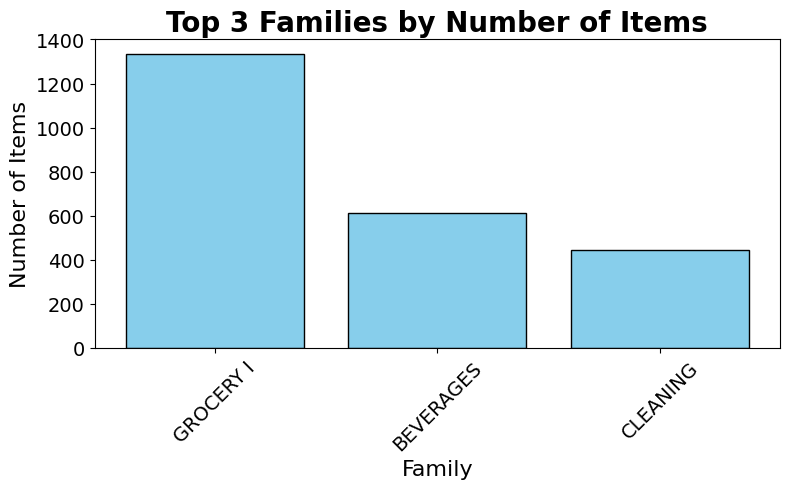

In [ ]:
# plot the number of top three family only
# compute the number of items per family and select the top 3
items_per_family = df_items['family'].value_counts().reset_index()
items_per_family.columns = ['Family', 'Item Count']
top_3_families=items_per_family.head(3)

# Plot the top 3 families
plt.figure(figsize=(8, 5))
plt.bar(top_3_families['Family'], top_3_families['Item Count'], color='skyblue', edgecolor='black')
plt.title("Top 3 Families by Number of Items", fontsize=20, fontweight='bold')
plt.xlabel("Family", fontsize=16)
plt.ylabel("Number of Items", fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
# Display the plot
plt.show()

In [ ]:
item_ids = df_items[df_items['family'].isin(top_3_families['Family'].unique())]['item_nbr'].unique()
df_train = df_train[df_train['item_nbr'].isin(item_ids)]
df_train.shape

(14745768, 6)

# Step 2: Checking missing data

In [ ]:
# check the missing data
df_train.isnull().sum()

,0
id,0
date,0
store_nbr,0
item_nbr,0
unit_sales,0
onpromotion,2747275


In [ ]:
unique_values = df_train['onpromotion'].unique()
print(f"Unique values in 'onpromotion': {unique_values}")



Unique values in 'onpromotion': [nan False True]


In [ ]:
# Replace the missing data as False in onpromotion column and change the data type as boolin, we can use 1 or 0
df_train['onpromotion'].fillna(0, inplace=True)
df_train['onpromotion'] = df_train['onpromotion'].astype(int)

<ipython-input-14-c98917005b8e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['onpromotion'].fillna(0, inplace=True)


In [ ]:
df_train['onpromotion'].unique()

array([0, 1])

# Step 3: Handling outliers

In [ ]:
# check weather outlier in unit_sales
df_train['unit_sales'].describe()

,unit_sales
count,1.474577e+07
mean,6.814486e+00
std,1.889631e+01
min,-1.000200e+04
25%,2.000000e+00
50%,3.000000e+00
75%,7.000000e+00
max,1.714600e+04


### it has negative values and huge different between min and max

In [ ]:
#checking for negative sales
negative_sales = df_train[df_train['unit_sales'] < 0]
# Replacing negative sales with 0 to reflect returns as non sales
df_train['unit_sales']=df_train['unit_sales'].apply(lambda x: 0 if x < 0 else x)
negative_sales.head()
df_train.head()


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
1,18790,2013-01-02,24,105574,12.0,0
2,18791,2013-01-02,24,105575,2.0,0
3,18792,2013-01-02,24,105577,1.0,0
4,18793,2013-01-02,24,105693,7.0,0
5,18794,2013-01-02,24,105737,17.0,0


In [ ]:
#Using Z_score to deal with extermely high unit sales, set the oulier that the data higher than 5 z score
from scipy import stats
# Calcuate the z_score for each store number and item number
def calculate_z_scores(group):
  group['z_score'] = stats.zscore(group['unit_sales'],nan_policy='omit')
  return group
# Apply the function to each group
df_train_grouped = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_z_scores)
# Filter outliers after grouping, and set z>5 as outlier
outliers = df_train_grouped[df_train_grouped['z_score'].abs() > 5]
# Print the outliers
print(f'Number of outliers: {len(outliers)}')
outliers.head()


Number of outliers: 48602


<ipython-input-18-349ec73a208e>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train_grouped = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_z_scores)


id        date  store_nbr  item_nbr  \
store_nbr item_nbr                                                       
24        96995    2853951   15666702  2013-12-18         24     96995   
          99197    10974605  59775862  2015-10-20         24     99197   
                   11074920  60322807  2015-10-26         24     99197   
          103520   2863747   15717753  2013-12-19         24    103520   
                   3457333   18886543  2014-02-13         24    103520   

                             unit_sales  onpromotion   z_score  
store_nbr item_nbr                                              
24        96995    2853951         14.0            0  7.964438  
          99197    10974605        14.0            0  5.837002  
                   11074920        19.0            0  8.297476  
          103520   2863747         27.0            0  6.645295  
                   3457333         22.0            0  5.156436

### Items are purchased extermely high in the holiday and outlier can used for another analysis

# step 4: Fill missing dates with zero sales

In [ ]:
## Convert' date' column to datetome format
df_train['date'] = pd.to_datetime(df_train['date'])
# Get the minimum and maximum in the dataset to create a full date range
min=df_train['date'].min()
max=df_train['date'].max()
full_date_range = pd.DataFrame({'date':pd.date_range(min,max, freq='D')})
# Create a Dataframe with all including store, item, date infos.
store_item_combinations=df_train[['store_nbr','item_nbr']].drop_duplicates()
all_combinations=pd.merge(store_item_combinations,full_date_range,how='cross')



In [ ]:
# Merge with the original data to fill missing dates
df_filled=all_combinations.merge(df_train, on=['store_nbr','item_nbr','date'],how='left')
df_filled.head()
# Filling missing values wih 0
df_filled['unit_sales']=df_filled['unit_sales'].fillna(0)
df_filled.head()
df_filled.shape

(35069356, 6)

In [ ]:
# save the df_filled
df_filled.to_csv('/content/drive/MyDrive/retail_kaggle_data/df_filled.csv', index=False)

## Replace with the original dataframe

In [ ]:
# read the data from df_filled
df_filled=pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/df_filled.csv')
df_filled.head()

,store_nbr,item_nbr,date,id,unit_sales,onpromotion
0,24,105574,2013-01-02,18790.0,12.0,0.0
1,24,105574,2013-01-03,59692.0,1.0,0.0
2,24,105574,2013-01-04,99664.0,3.0,0.0
3,24,105574,2013-01-05,140805.0,4.0,0.0
4,24,105574,2013-01-06,182800.0,7.0,0.0


In [ ]:
df_train=df_filled
df_train.head()

,store_nbr,item_nbr,date,id,unit_sales,onpromotion
0,24,105574,2013-01-02,18790.0,12.0,0.0
1,24,105574,2013-01-03,59692.0,1.0,0.0
2,24,105574,2013-01-04,99664.0,3.0,0.0
3,24,105574,2013-01-05,140805.0,4.0,0.0
4,24,105574,2013-01-06,182800.0,7.0,0.0


# step 5: Feature  Engineering

In [ ]:
# Time based Features
# Convert date Column to datetime
df_train['date']=pd.to_datetime(df_train['date'])
# Creating new time-based deatures
df_train['year']=df_train['date'].dt.year
df_train['month']=df_train['date'].dt.month
df_train['day']=df_train['date'].dt.day
df_train['day_of_week']=df_train['date'].dt.dayofweek

## Prepare for time series analysis

In [ ]:
# calculate rolling mean of unit_sales
df_train['rolling_mean_7']=df_train.groupby(['store_nbr','item_nbr'])['unit_sales'].transform(lambda x: x.rolling(7).mean())



In [ ]:
df_train.head()

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,rolling_mean_7
0,24,105574,2013-01-02,18790.0,12.0,0.0,2013,1,2,2,NaN
1,24,105574,2013-01-03,59692.0,1.0,0.0,2013,1,3,3,NaN
2,24,105574,2013-01-04,99664.0,3.0,0.0,2013,1,4,4,NaN
3,24,105574,2013-01-05,140805.0,4.0,0.0,2013,1,5,5,NaN
4,24,105574,2013-01-06,182800.0,7.0,0.0,2013,1,6,6,NaN


# step 6: Visualization of Time Series Data

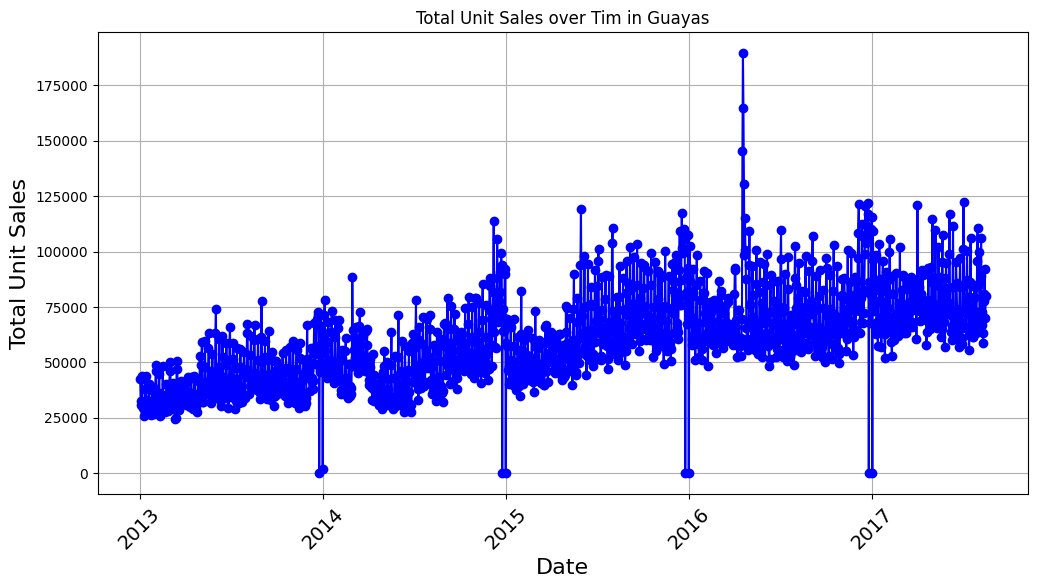

In [ ]:
# Sales over time (aggregated)
sales_by_date=df_train.groupby('date')['unit_sales'].sum()
plt.figure(figsize=(12,6))
plt.plot(sales_by_date.index, sales_by_date.values, marker='o', linestyle='-', color='b')
plt.title('Total Unit Sales over Tim in Guayas')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Total Unit Sales',fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.grid(True)
plt.show()

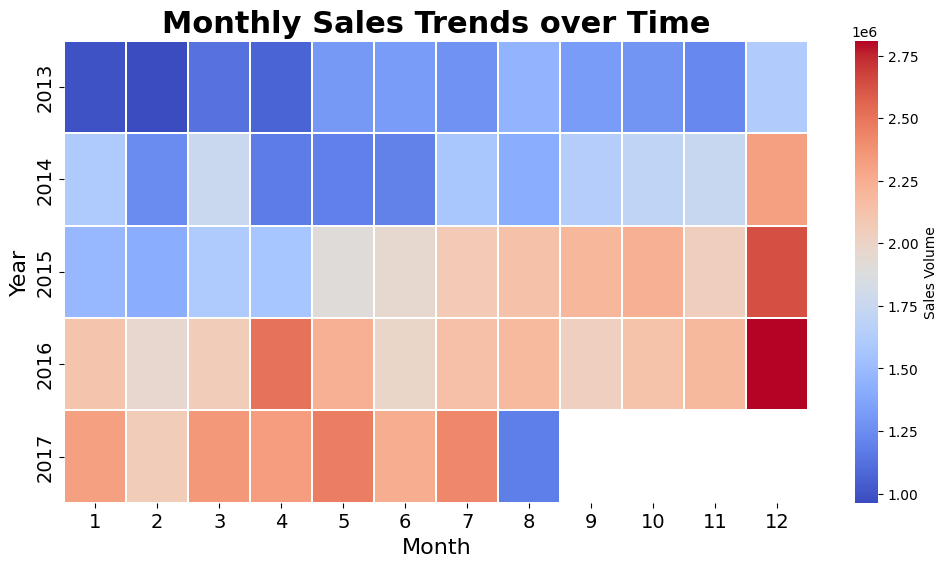

In [ ]:
## sales trend by year and month
# Aggregate by year and month
sales_by_year_month=df_train.groupby(['year','month'])['unit_sales'].sum().unstack() # unstack is from the multiindex to the table form to get the column(month) and row(years)
# Plot heatmap of unit_sales by year and month
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(sales_by_year_month, cmap='coolwarm', linewidths=0.2, linecolor='white',cbar_kws={'label': "Sales Volume"})
plt.title('Monthly Sales Trends over Time', fontsize=22, fontweight='bold')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Year', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Step7: Analysing the Holiday Impact

In [ ]:
# Convert date column to datetime
df_holidays_events['date']=pd.to_datetime(df_holidays_events['date'])
print("Holidays range: from",df_holidays_events['date'].dt.date.min(),"till",df_holidays_events['date'].dt.date.max())

Holidays range: from 2012-03-02 till 2017-12-26


In [ ]:
# Merge the training data with the holiday data
df_train_holiday=df_train.merge(df_holidays_events, on='date', how='left')

In [ ]:
# Aggregate the data with holiday
holiday_sales=df_train_holiday.groupby('type')['unit_sales'].mean()

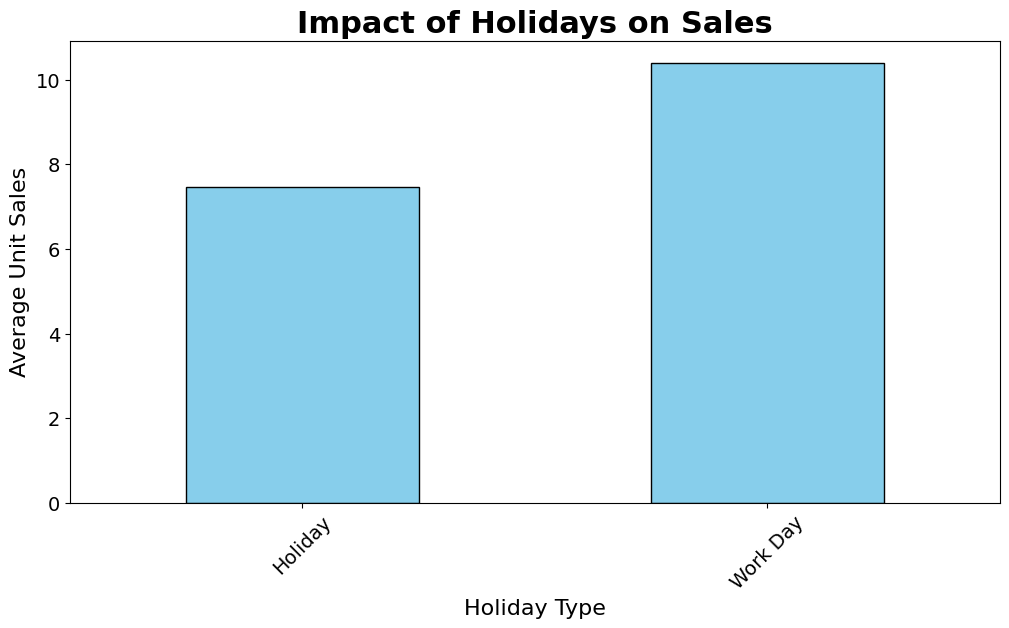

In [ ]:
# Plot the holiday impact
plt.figure(figsize=(12,6))
holiday_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Impact of Holidays on Sales', fontsize=22, fontweight='bold')
plt.xlabel('Holiday Type', fontsize=16)
plt.ylabel('Average Unit Sales', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.show()

The average unut sale by Work day is higher than the Holiday

# Step 8: Analyzing Perishable Items


In [ ]:
# Merging df_train with items to get the perishable date
df_train_items=df_train.merge(df_items, on='item_nbr', how='left')
df_train_items['perishable']=df_train_items['perishable'].astype(bool)

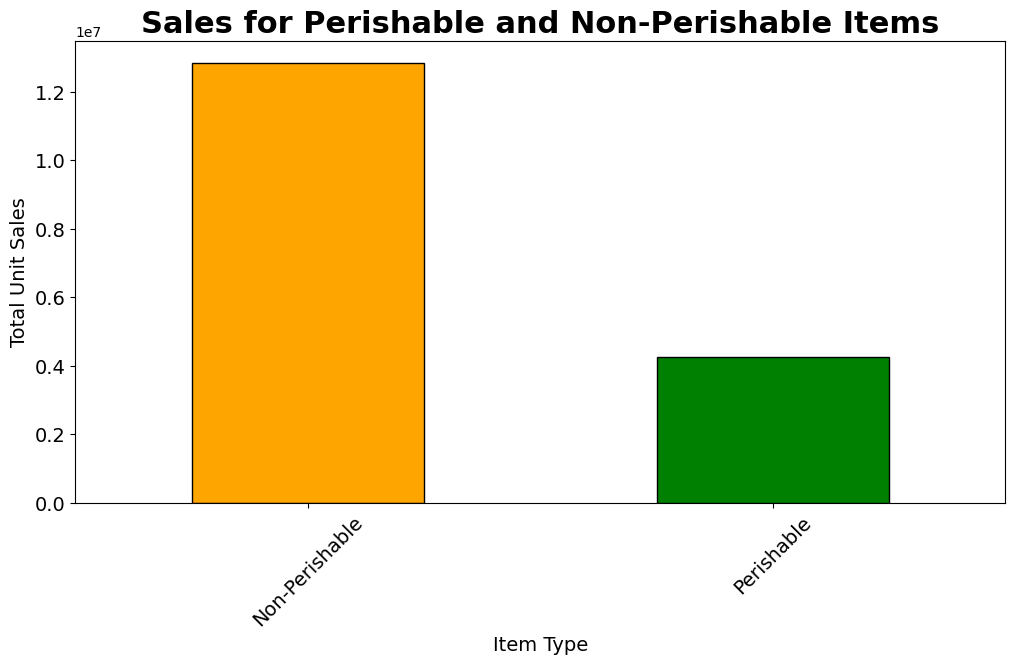

In [ ]:
# Aggregate sales by perishable items
perishable_sales=df_train_items.groupby('perishable')['unit_sales'].sum()

# Plot sales for perishable and non-perishable items
plt.figure(figsize=(12,6))
perishable_sales.plot(kind='bar', color=['orange','green'],edgecolor='black')
plt.title('Sales for Perishable and Non-Perishable Items', fontsize=22, fontweight='bold')
plt.xlabel('Item Type', fontsize=14)
plt.ylabel('Total Unit Sales', fontsize=14)
plt.xticks([0,1],['Non-Perishable','Perishable'],fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.show()

The perishable items are about 30% of the total sales

In [ ]:
0.5/1.7

0.29411764705882354